In [1]:
!pip install spacy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import string 

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import requests
from bs4 import BeautifulSoup as bs 

In [2]:
!python -m spacy download en_core_web_sm 

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
samsung_reviews=[]

# Extracting reviews from amazon for product Samsung Galaxy A54 5G

In [4]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Samsung-Awesome-Graphite-Storage-Gorilla/product-reviews/B0BXCZNH3B/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op 

In [5]:
 samsung_reviews

["\nIn a mobile for the user,  depends upon the usages on our daily communication needs. Samsung has tried to combine both for gaming and technical savy in it's latest A Series A54 5G mobile phone, bought by me of 8GB RAM and 256 GB ROM model. Look wise can compare to Iphone as gorilla glass 5  IP 67 on both sides and size 6.4 inches is also very ideal to hold.Processor the main component  Exynoys 1380, 2.4GHz,2GHz Octa-Core developed by Samsung is suitable for normal task and no lagging while using. Another add on is the latest Android 13 ,v13 operating system version. As usual super AMOLED ( FHD)1080x2340 pixels with 5000 mah battery is sufficient to run it whole day.I had to purchase Samsung 25 watt adopter as the same is not included. Silicon back cover, accessories like screen guard are a must for safety of the mobile phones excluded. I have been using the smartphone for last fortnight without any issue. As per the specifications the Samsung phone seems to be over priced compare t

# Text Processing

In [6]:
# Joining the list into one string/text
text = ' '.join(samsung_reviews)
text   

"\nIn a mobile for the user,  depends upon the usages on our daily communication needs. Samsung has tried to combine both for gaming and technical savy in it's latest A Series A54 5G mobile phone, bought by me of 8GB RAM and 256 GB ROM model. Look wise can compare to Iphone as gorilla glass 5  IP 67 on both sides and size 6.4 inches is also very ideal to hold.Processor the main component  Exynoys 1380, 2.4GHz,2GHz Octa-Core developed by Samsung is suitable for normal task and no lagging while using. Another add on is the latest Android 13 ,v13 operating system version. As usual super AMOLED ( FHD)1080x2340 pixels with 5000 mah battery is sufficient to run it whole day.I had to purchase Samsung 25 watt adopter as the same is not included. Silicon back cover, accessories like screen guard are a must for safety of the mobile phones excluded. I have been using the smartphone for last fortnight without any issue. As per the specifications the Samsung phone seems to be over priced compare to

In [7]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(text)
print(tweets_tokens) 

['In', 'a', 'mobile', 'for', 'the', 'user', ',', 'depends', 'upon', 'the', 'usages', 'on', 'our', 'daily', 'communication', 'needs', '.', 'Samsung', 'has', 'tried', 'to', 'combine', 'both', 'for', 'gaming', 'and', 'technical', 'savy', 'in', "it's", 'latest', 'A', 'Series', 'A54', '5G', 'mobile', 'phone', ',', 'bought', 'by', 'me', 'of', '8GB', 'RAM', 'and', '256', 'GB', 'ROM', 'model', '.', 'Look', 'wise', 'can', 'compare', 'to', 'Iphone', 'as', 'gorilla', 'glass', '5', 'IP', '67', 'on', 'both', 'sides', 'and', 'size', '6.4', 'inches', 'is', 'also', 'very', 'ideal', 'to', 'hold.Processor', 'the', 'main', 'component', 'Exynoys', '1380', ',', '2.4', 'GHz', ',', '2GHz', 'Octa-Core', 'developed', 'by', 'Samsung', 'is', 'suitable', 'for', 'normal', 'task', 'and', 'no', 'lagging', 'while', 'using', '.', 'Another', 'add', 'on', 'is', 'the', 'latest', 'Android', '13', ',', 'v13', 'operating', 'system', 'version', '.', 'As', 'usual', 'super', 'AMOLED', '(', 'FHD', ')', '1080x2340', 'pixels', 'w

In [8]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text


"In a mobile for the user , depends upon the usages on our daily communication needs . Samsung has tried to combine both for gaming and technical savy in it's latest A Series A54 5G mobile phone , bought by me of 8GB RAM and 256 GB ROM model . Look wise can compare to Iphone as gorilla glass 5 IP 67 on both sides and size 6.4 inches is also very ideal to hold.Processor the main component Exynoys 1380 , 2.4 GHz , 2GHz Octa-Core developed by Samsung is suitable for normal task and no lagging while using . Another add on is the latest Android 13 , v13 operating system version . As usual super AMOLED ( FHD ) 1080x2340 pixels with 5000 mah battery is sufficient to run it whole day . I had to purchase Samsung 25 watt adopter as the same is not included . Silicon back cover , accessories like screen guard are a must for safety of the mobile phones excluded . I have been using the smartphone for last fortnight without any issue . As per the specifications the Samsung phone seems to be over pri

In [9]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text 

'In a mobile for the user  depends upon the usages on our daily communication needs  Samsung has tried to combine both for gaming and technical savy in its latest A Series A54 5G mobile phone  bought by me of 8GB RAM and 256 GB ROM model  Look wise can compare to Iphone as gorilla glass 5 IP 67 on both sides and size 64 inches is also very ideal to holdProcessor the main component Exynoys 1380  24 GHz  2GHz OctaCore developed by Samsung is suitable for normal task and no lagging while using  Another add on is the latest Android 13  v13 operating system version  As usual super AMOLED  FHD  1080x2340 pixels with 5000 mah battery is sufficient to run it whole day  I had to purchase Samsung 25 watt adopter as the same is not included  Silicon back cover  accessories like screen guard are a must for safety of the mobile phones excluded  I have been using the smartphone for last fortnight without any issue  As per the specifications the Samsung phone seems to be over priced compare to other 

In [10]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'In a mobile for the user  depends upon the usages on our daily communication needs  Samsung has tried to combine both for gaming and technical savy in its latest A Series A54 5G mobile phone  bought by me of 8GB RAM and 256 GB ROM model  Look wise can compare to Iphone as gorilla glass 5 IP 67 on both sides and size 64 inches is also very ideal to holdProcessor the main component Exynoys 1380  24 GHz  2GHz OctaCore developed by Samsung is suitable for normal task and no lagging while using  Another add on is the latest Android 13  v13 operating system version  As usual super AMOLED  FHD  1080x2340 pixels with 5000 mah battery is sufficient to run it whole day  I had to purchase Samsung 25 watt adopter as the same is not included  Silicon back cover  accessories like screen guard are a must for safety of the mobile phones excluded  I have been using the smartphone for last fortnight without any issue  As per the specifications the Samsung phone seems to be over priced compare to other 

In [11]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['In', 'a', 'mobile', 'for', 'the', 'user', 'depends', 'upon', 'the', 'usages', 'on', 'our', 'daily', 'communication', 'needs', 'Samsung', 'has', 'tried', 'to', 'combine', 'both', 'for', 'gaming', 'and', 'technical', 'savy', 'in', 'its', 'latest', 'A', 'Series', 'A54', '5G', 'mobile', 'phone', 'bought', 'by', 'me', 'of', '8GB', 'RAM', 'and', '256', 'GB', 'ROM', 'model', 'Look', 'wise', 'can', 'compare', 'to', 'Iphone', 'as', 'gorilla', 'glass', '5', 'IP', '67', 'on', 'both', 'sides', 'and', 'size', '64', 'inches', 'is', 'also', 'very', 'ideal', 'to', 'holdProcessor', 'the', 'main', 'component', 'Exynoys', '1380', '24', 'GHz', '2GHz', 'OctaCore', 'developed', 'by', 'Samsung', 'is', 'suitable', 'for', 'normal', 'task', 'and', 'no', 'lagging', 'while', 'using', 'Another', 'add', 'on', 'is', 'the', 'latest', 'Android', '13', 'v13', 'operating', 'system', 'version', 'As', 'usual', 'super', 'AMOLED', 'FHD', '1080x2340', 'pixels', 'with', '5000', 'mah', 'battery', 'is', 'sufficient', 'to', 'r

In [12]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srikanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srikanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
len(text_tokens) 

6480

In [14]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['In', 'mobile', 'user', 'depends', 'upon', 'usages', 'daily', 'communication', 'needs', 'Samsung', 'tried', 'combine', 'gaming', 'technical', 'savy', 'latest', 'Series', 'A54', '5G', 'mobile', 'phone', 'bought', '8GB', 'RAM', '256', 'GB', 'ROM', 'model', 'Look', 'wise', 'compare', 'Iphone', 'gorilla', 'glass', '5', 'IP', '67', 'sides', 'size', '64', 'inches', 'also', 'ideal', 'holdProcessor', 'main', 'component', 'Exynoys', '1380', '24', 'GHz', '2GHz', 'OctaCore', 'developed', 'Samsung', 'suitable', 'normal', 'task', 'lagging', 'using', 'Another', 'add', 'latest', 'Android', '13', 'v13', 'operating', 'system', 'version', 'As', 'usual', 'super', 'AMOLED', 'FHD', '1080x2340', 'pixels', '5000', 'mah', 'battery', 'sufficient', 'run', 'whole', 'day', 'purchase', 'Samsung', '25', 'watt', 'adopter', 'included', 'Silicon', 'back', 'cover', 'accessories', 'like', 'screen', 'guard', 'must', 'safety', 'mobile', 'phones', 'excluded', 'using', 'smartphone', 'last', 'fortnight', 'without', 'issue',

In [15]:
#Noramalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words)  

['in', 'mobile', 'user', 'depends', 'upon', 'usages', 'daily', 'communication', 'needs', 'samsung', 'tried', 'combine', 'gaming', 'technical', 'savy', 'latest', 'series', 'a54', '5g', 'mobile', 'phone', 'bought', '8gb', 'ram', '256', 'gb', 'rom', 'model', 'look', 'wise', 'compare', 'iphone', 'gorilla', 'glass', '5', 'ip', '67', 'sides', 'size', '64', 'inches', 'also', 'ideal', 'holdprocessor', 'main', 'component', 'exynoys', '1380', '24', 'ghz', '2ghz', 'octacore', 'developed', 'samsung', 'suitable', 'normal', 'task', 'lagging', 'using', 'another', 'add', 'latest', 'android', '13', 'v13', 'operating', 'system', 'version', 'as', 'usual', 'super', 'amoled', 'fhd', '1080x2340', 'pixels', '5000', 'mah', 'battery', 'sufficient', 'run', 'whole', 'day', 'purchase', 'samsung', '25', 'watt', 'adopter', 'included', 'silicon', 'back', 'cover', 'accessories', 'like', 'screen', 'guard', 'must', 'safety', 'mobile', 'phones', 'excluded', 'using', 'smartphone', 'last', 'fortnight', 'without', 'issue',

In [16]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)  

['in', 'mobil', 'user', 'depend', 'upon', 'usag', 'daili', 'commun', 'need', 'samsung', 'tri', 'combin', 'game', 'technic', 'savi', 'latest', 'seri', 'a54', '5g', 'mobil', 'phone', 'bought', '8gb', 'ram', '256', 'gb', 'rom', 'model', 'look', 'wise', 'compar', 'iphon', 'gorilla', 'glass', '5', 'ip', '67', 'side', 'size', '64', 'inch', 'also', 'ideal', 'holdprocessor', 'main', 'compon', 'exynoy', '1380', '24', 'ghz', '2ghz', 'octacor', 'develop', 'samsung', 'suitabl', 'normal', 'task', 'lag', 'use', 'anoth', 'add', 'latest', 'android', '13', 'v13', 'oper', 'system', 'version', 'as', 'usual', 'super', 'amol', 'fhd', '1080x2340', 'pixel', '5000', 'mah', 'batteri', 'suffici', 'run', 'whole', 'day', 'purchas', 'samsung', '25', 'watt', 'adopt', 'includ', 'silicon', 'back', 'cover', 'accessori', 'like', 'screen', 'guard', 'must', 'safeti', 'mobil', 'phone', 'exclud', 'use', 'smartphon', 'last', 'fortnight', 'without', 'issu', 'as', 'per', 'specif', 'samsung', 'phone', 'seem', 'price', 'compar'

In [21]:
# Lemmatization
import spacy
nlp= spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc) 

in mobile user depends upon usages daily communication needs samsung tried combine gaming technical savy latest series a54 5g mobile phone bought 8gb ram 256 gb rom model look wise compare iphone gorilla glass 5 ip 67 sides size 64 inches also ideal holdprocessor main component exynoys 1380 24 ghz 2ghz octacore developed samsung suitable normal task lagging using another add latest android 13 v13 operating system version as usual super amoled fhd 1080x2340 pixels 5000 mah battery sufficient run whole day purchase samsung 25 watt adopter included silicon back cover accessories like screen guard must safety mobile phones excluded using smartphone last fortnight without issue as per specifications samsung phone seems priced compare brands segment flagship smartphonethanks amazon promise delivery time decent mobile phone everything perfect except 2 things 1st give glass guard along phone 2nd charger wire fine giving adapter gave atlest usb wire recipe wire sided c face could charger phone 

In [22]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['in', 'mobile', 'user', 'depend', 'upon', 'usage', 'daily', 'communication', 'need', 'samsung', 'try', 'combine', 'game', 'technical', 'savy', 'late', 'series', 'a54', '5', 'g', 'mobile', 'phone', 'buy', '8', 'gb', 'ram', '256', 'gb', 'rom', 'model', 'look', 'wise', 'compare', 'iphone', 'gorilla', 'glass', '5', 'ip', '67', 'side', 'size', '64', 'inch', 'also', 'ideal', 'holdprocessor', 'main', 'component', 'exynoy', '1380', '24', 'ghz', '2ghz', 'octacore', 'develop', 'samsung', 'suitable', 'normal', 'task', 'lag', 'use', 'another', 'add', 'late', 'android', '13', 'v13', 'operating', 'system', 'version', 'as', 'usual', 'super', 'amole', 'fhd', '1080x2340', 'pixel', '5000', 'mah', 'battery', 'sufficient', 'run', 'whole', 'day', 'purchase', 'samsung', '25', 'watt', 'adopter', 'include', 'silicon', 'back', 'cover', 'accessory', 'like', 'screen', 'guard', 'must', 'safety', 'mobile', 'phone', 'exclude', 'use', 'smartphone', 'last', 'fortnight', 'without', 'issue', 'as', 'per', 'specificatio

In [23]:
clean_reviews=' '.join(lemmas)
clean_reviews 

'in mobile user depend upon usage daily communication need samsung try combine game technical savy late series a54 5 g mobile phone buy 8 gb ram 256 gb rom model look wise compare iphone gorilla glass 5 ip 67 side size 64 inch also ideal holdprocessor main component exynoy 1380 24 ghz 2ghz octacore develop samsung suitable normal task lag use another add late android 13 v13 operating system version as usual super amole fhd 1080x2340 pixel 5000 mah battery sufficient run whole day purchase samsung 25 watt adopter include silicon back cover accessory like screen guard must safety mobile phone exclude use smartphone last fortnight without issue as per specification samsung phone seem price compare brand segment flagship smartphonethank amazon promise delivery time decent mobile phone everything perfect except 2 thing 1st give glass guard along phone 2nd charger wire fine give adapter give atlest usb wire recipe wire side c face could charger phone get surprised give kind wire provide adap

# Emotion Mining - Sentiment Analysis¶ 

In [28]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(samsung_reviews))
sentences 

['\nIn a mobile for the user,  depends upon the usages on our daily communication needs.',
 "Samsung has tried to combine both for gaming and technical savy in it's latest A Series A54 5G mobile phone, bought by me of 8GB RAM and 256 GB ROM model.",
 'Look wise can compare to Iphone as gorilla glass 5  IP 67 on both sides and size 6.4 inches is also very ideal to hold.Processor the main component  Exynoys 1380, 2.4GHz,2GHz Octa-Core developed by Samsung is suitable for normal task and no lagging while using.',
 'Another add on is the latest Android 13 ,v13 operating system version.',
 'As usual super AMOLED ( FHD)1080x2340 pixels with 5000 mah battery is sufficient to run it whole day.I had to purchase Samsung 25 watt adopter as the same is not included.',
 'Silicon back cover, accessories like screen guard are a must for safety of the mobile phones excluded.',
 'I have been using the smartphone for last fortnight without any issue.',
 'As per the specifications the Samsung phone seems

In [29]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"\nIn a mobile for the user, depends upon the ..."
1,Samsung has tried to combine both for gaming a...
2,Look wise can compare to Iphone as gorilla gla...
3,"Another add on is the latest Android 13 ,v13 o..."
4,As usual super AMOLED ( FHD)1080x2340 pixels w...
...,...
248,The build quality is really awesome and the lo...
249,Go for it.
250,"While the speed is good, the battery doesn't l..."
251,"A bit overpriced, just works as expected, not ..."


In [30]:
from afinn import Afinn
import pandas as pd
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [31]:
afinn.head() 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [32]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [33]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score 

In [34]:
# manual testing
calculate_sentiment(text='good service')

3

In [35]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2     -3
3      0
4      3
      ..
248    4
249    0
250    3
251    3
252    5
Name: sentiment_value, Length: 253, dtype: int64

In [36]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      15
1      31
2      45
3      12
4      31
       ..
248    13
249     3
250    16
251    10
252     9
Name: word_count, Length: 253, dtype: int64

In [37]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
156,Look wise can compare to Iphone as gorilla gla...,-3,45
114,Look wise can compare to Iphone as gorilla gla...,-3,45
128,Look wise can compare to Iphone as gorilla gla...,-3,45
30,Look wise can compare to Iphone as gorilla gla...,-3,45
44,Look wise can compare to Iphone as gorilla gla...,-3,45
...,...,...,...
107,I like this product in this price range..I wan...,8,28
65,I like this product in this price range..I wan...,8,28
219,I like this product in this price range..I wan...,8,28
79,I like this product in this price range..I wan...,8,28


In [38]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    253.000000
mean       2.632411
std        2.947163
min       -3.000000
25%        0.000000
50%        3.000000
75%        5.000000
max        8.000000
Name: sentiment_value, dtype: float64

In [39]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,"\nIn a mobile for the user, depends upon the ...",0,15
1,Samsung has tried to combine both for gaming a...,0,31
2,Look wise can compare to Iphone as gorilla gla...,-3,45
3,"Another add on is the latest Android 13 ,v13 o...",0,12
6,I have been using the smartphone for last fort...,0,12
...,...,...,...
239,Samsung has tried to combine both for gaming a...,0,31
240,Look wise can compare to Iphone as gorilla gla...,-3,45
241,"Another add on is the latest Android 13 ,v13 o...",0,12
244,I have been using the smartphone for last fort...,0,12


In [40]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
4,As usual super AMOLED ( FHD)1080x2340 pixels w...,3,31
5,"Silicon back cover, accessories like screen gu...",2,17
7,As per the specifications the Samsung phone se...,5,30
8,decent mobile phone\n \nEverything was perfect...,7,83
9,I like this product in this price range..I wan...,8,28
...,...,...,...
247,I like this product in this price range..I wan...,8,28
248,The build quality is really awesome and the lo...,4,13
250,"While the speed is good, the battery doesn't l...",3,16
251,"A bit overpriced, just works as expected, not ...",3,10


In [41]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df 

,sentence,sentiment_value,word_count,index
0,"\nIn a mobile for the user, depends upon the ...",0,15,0
1,Samsung has tried to combine both for gaming a...,0,31,1
2,Look wise can compare to Iphone as gorilla gla...,-3,45,2
3,"Another add on is the latest Android 13 ,v13 o...",0,12,3
4,As usual super AMOLED ( FHD)1080x2340 pixels w...,3,31,4
...,...,...,...,...
248,The build quality is really awesome and the lo...,4,13,248
249,Go for it.,0,3,249
250,"While the speed is good, the battery doesn't l...",3,16,250
251,"A bit overpriced, just works as expected, not ...",3,10,251


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

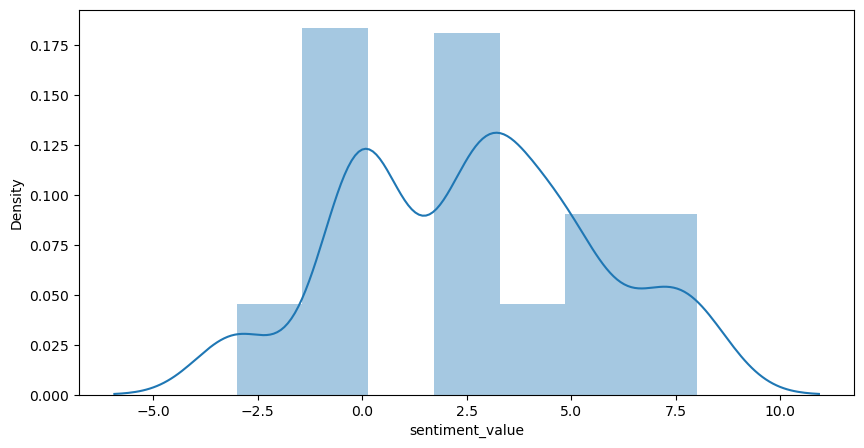

In [44]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

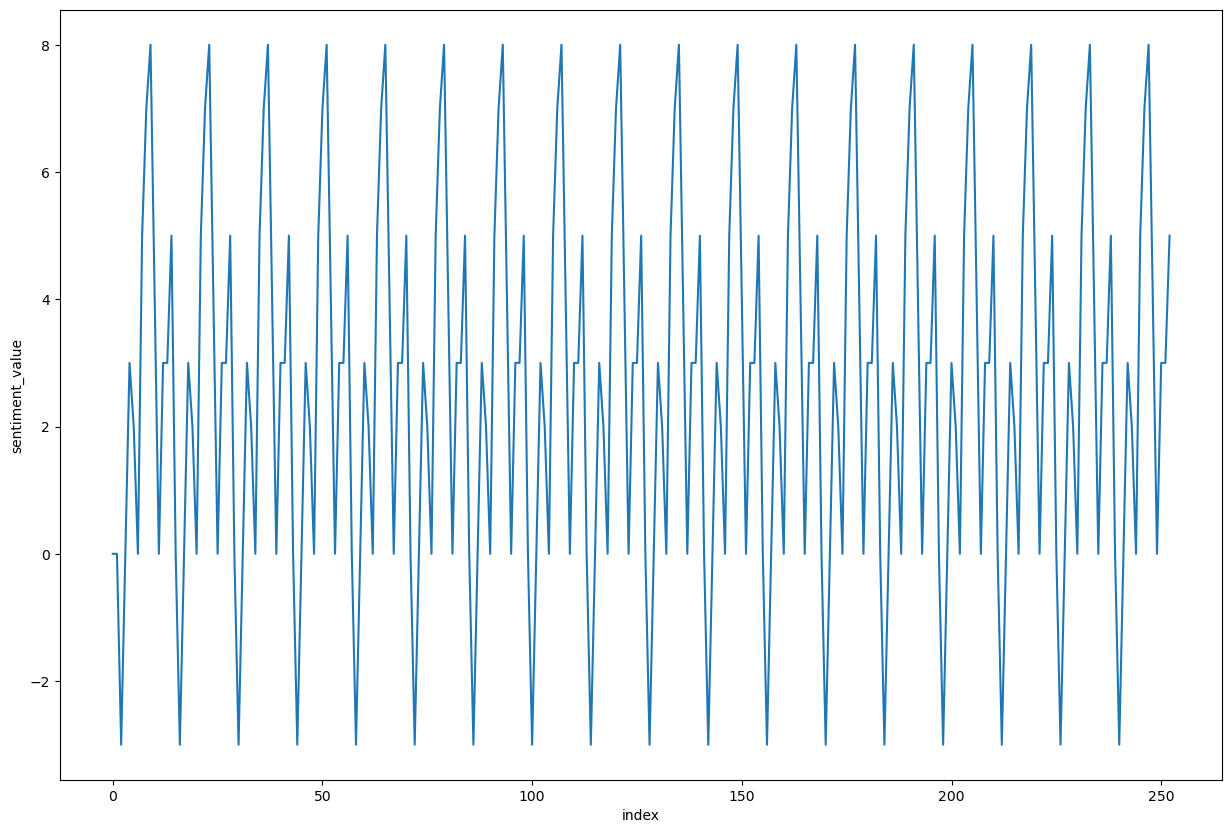

In [45]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

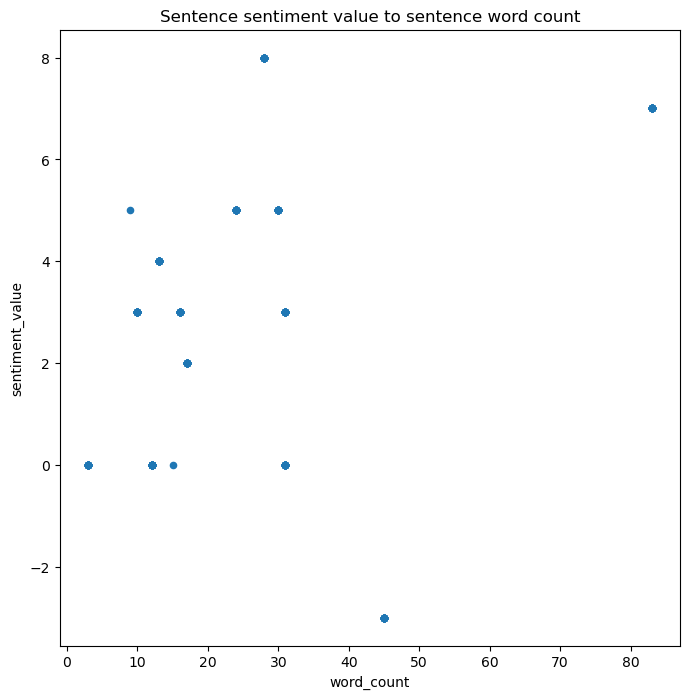

In [46]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')